#### Analyzing Star wars movie survey data:

In this notebook, We trying to clean and analyze the Star wars survey data provided by FiveThirtyEight. As we understand that this data is related to people's perspective about Star Wars sequels. We are going to formulate few questions for us to find out. As our analysis is open-ended, we are going to keep an eye for any interesting insight along our journey. 

For now, let's look at few columns:

- `RespondentID` - An anonymized ID for the respondent (person taking the survey)
- `Gender` - The respondent's gender
- `Age` - The respondent's age
- `Household Income` - The respondent's income
- `Education` - The respondent's education level
- `Location` (Census Region) - The respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?` - Has a Yes or No response
- `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a Yes or No response

Now, we have surface understanding of the data. We'll formulate few questions like:
- Q. Most viewed sequels of the Star Wars?
- Q. Which sequel is more popular among the age group?
- Q. What category of people have more tendency to watch all the sequels of Star wars?

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv',
                          encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [3]:
df.columns.values

array(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with th

In [6]:
df.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [7]:
df.describe(include='all')

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
count,1.186000e+03,1187,837,674,572,551,608,759,739,836,...,827,829,829,214,1069,1047,1047,859,1037,1044
unique,NaN,3,3,1,1,1,1,1,1,7,...,7,4,3,3,3,3,5,6,6,10
top,NaN,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,No,No,Female,45-60,"$50,000 - $99,999",Some college or Associate degree,East North Central
freq,NaN,936,552,674,572,551,608,759,739,237,...,605,325,615,114,641,549,291,298,328,181
mean,3.290128e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.055639e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.288373e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.289451e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.290147e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.290814e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
star_wars_df = df.copy()

In [19]:
df.shape

(1187, 38)

In [20]:
star_wars_df = star_wars_df[star_wars_df['RespondentID'].notnull()]
star_wars_df.shape

(1186, 38)

In [21]:
star_wars_df['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

There are no missing values in this column.

In [9]:
star_wars_df['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

We can see there are 284 missing values in this columns.

Let's map the 'Yes' & 'No' value to 'True' & 'False'. This will make you working with pandas lot easier. You can work as it is if you refer.

In [22]:
yes_no_map = { 'Yes': True, 'No':False}

In [23]:
star_wars_df['Have you seen any of the 6 films in the Star Wars franchise?'] = \
    star_wars_df['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no_map)
star_wars_df['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [24]:
star_wars_df['Do you consider yourself to be a fan of the Star Wars film franchise?'] = \
star_wars_df['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no_map)
star_wars_df['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [25]:
star_wars_df.columns.values

array(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with th

In [26]:
star_wars_df['Unnamed: 4'].value_counts()

Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64

###### Change the column names

In [34]:
rename_cols = {
'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
    'Unnamed: 4':'seen_2', 
    'Unnamed: 5':'seen_3', 
    'Unnamed: 6':'seen_4', 
    'Unnamed: 7':'seen_5',
    'Unnamed: 8':'seen_6'}

In [35]:
for col in star_wars_df.columns.values[3:9]:
    print(f'{col} = > {rename_cols[col]}')

Which of the following Star Wars films have you seen? Please select all that apply. = > seen_1
Unnamed: 4 = > seen_2
Unnamed: 5 = > seen_3
Unnamed: 6 = > seen_4
Unnamed: 7 = > seen_5
Unnamed: 8 = > seen_6


In [36]:
star_wars_df.columns.values[3:9]

array(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8'], dtype=object)

In [37]:
for col in star_wars_df.columns.values[3:9]:
    star_wars_df = star_wars_df.rename(columns={col:rename_cols[col]})

In [38]:
star_wars_df.columns.values[3:9]

array(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'],
      dtype=object)

Let's change the columns values as true and False.

`{
"Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False
}`

In [49]:
print('Before mapping the values of the columns')
print('')
for col in star_wars_df.columns.values[3:9]:
    print(star_wars_df[col].value_counts())
    print('')

Before mapping the values of the columns

Star Wars: Episode I  The Phantom Menace    673
Name: seen_1, dtype: int64

Star Wars: Episode II  Attack of the Clones    571
Name: seen_2, dtype: int64

Star Wars: Episode III  Revenge of the Sith    550
Name: seen_3, dtype: int64

Star Wars: Episode IV  A New Hope    607
Name: seen_4, dtype: int64

Star Wars: Episode V The Empire Strikes Back    758
Name: seen_5, dtype: int64

Star Wars: Episode VI Return of the Jedi    738
Name: seen_6, dtype: int64



In [45]:
#let's make the mapping dictionary for each one
mapping_dict = {'seen_1':{
    "Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False
},

'seen_2':{
    "Star Wars: Episode II  Attack of the Clones": True,
    np.NaN: False
},

'seen_3':{
    "Star Wars: Episode III  Revenge of the Sith": True,
    np.NaN: False
},

'seen_4':{
    "Star Wars: Episode IV  A New Hope": True,
    np.NaN: False
},

'seen_5':{
    "Star Wars: Episode V The Empire Strikes Back": True,
    np.NaN: False
},

'seen_6':{
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}
               }

In [46]:
for key,value in mapping_dict.items():
    print(key)
    print(value)
    print('')

seen_1
{'Star Wars: Episode I  The Phantom Menace': True, nan: False}

seen_2
{'Star Wars: Episode II  Attack of the Clones': True, nan: False}

seen_3
{'Star Wars: Episode III  Revenge of the Sith': True, nan: False}

seen_4
{'Star Wars: Episode IV  A New Hope': True, nan: False}

seen_5
{'Star Wars: Episode V The Empire Strikes Back': True, nan: False}

seen_6
{'Star Wars: Episode VI Return of the Jedi': True, nan: False}



In [47]:
mapping_dict['seen_1']

{'Star Wars: Episode I  The Phantom Menace': True, nan: False}

In [50]:
for col in star_wars_df.columns.values[3:9]:
    star_wars_df[col] = star_wars_df[col].map(mapping_dict[col])

In [51]:
print('After mapping the values of the columns')
print('')
for col in star_wars_df.columns.values[3:9]:
    print(star_wars_df[col].value_counts())
    print('')

After mapping the values of the columns

True     673
False    513
Name: seen_1, dtype: int64

False    615
True     571
Name: seen_2, dtype: int64

False    636
True     550
Name: seen_3, dtype: int64

True     607
False    579
Name: seen_4, dtype: int64

True     758
False    428
Name: seen_5, dtype: int64

True     738
False    448
Name: seen_6, dtype: int64



Lets do the same for rest of the columns

In [52]:
for col in star_wars_df.columns[9:15]:
    print(col)

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
Unnamed: 10
Unnamed: 11
Unnamed: 12
Unnamed: 13
Unnamed: 14


In [55]:
# change the ranking to numeric
star_wars_df[star_wars_df.columns[9:15]] = \
            star_wars_df[star_wars_df.columns[9:15]].astype(float)

In [56]:
star_wars_df.columns.values[9:15]

array(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'], dtype=object)

In [57]:
rename_cols_1 = {
'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
    'Unnamed: 10':'ranking_2', 
    'Unnamed: 11':'ranking_3', 
    'Unnamed: 12':'ranking_4', 
    'Unnamed: 13':'ranking_5',
    'Unnamed: 14':'ranking_6'}

In [58]:
for col in star_wars_df.columns.values[9:15]:
    star_wars_df = star_wars_df.rename(columns={col:rename_cols_1[col]})
    
star_wars_df.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

###### 6. Find the highest-Ranked Movie

In [71]:
ranking_mean =star_wars_df[star_wars_df.columns.values[9:15]].mean()

In [72]:
ranking_mean.index

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

In [73]:
ranking_mean.values

array([3.73293413, 4.08732057, 4.34131737, 3.27272727, 2.51315789,
       3.04784689])

In [74]:
import matplotlib.pyplot as plt

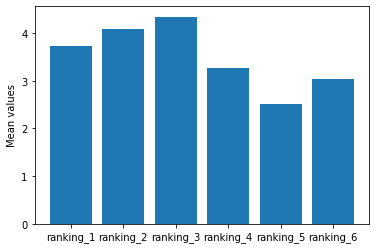

In [79]:
plt.bar(ranking_mean.index,ranking_mean.values)
plt.ylabel('Mean values')
plt.show()

###### 7. Finding The Most Viewed Movie

In [82]:
popular_movies = star_wars_df[star_wars_df.columns[3:9]].sum()
popular_movies

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

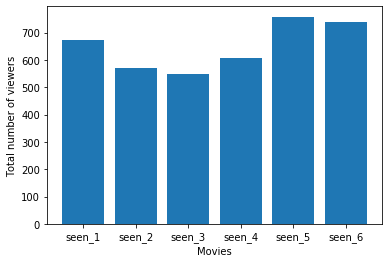

In [84]:
plt.bar(popular_movies.index,popular_movies.values)
plt.ylabel('Total number of viewers')
plt.xlabel('Movies')
plt.show()

###### 8. Exploring the Data by Binary Segments

In [85]:
males_df = star_wars_df[star_wars_df["Gender"] == "Male"]
females_df = star_wars_df[star_wars_df["Gender"] == "Female"]

In [87]:
ranking_male =males_df[males_df.columns.values[9:15]].mean()
ranking_female =females_df[females_df.columns.values[9:15]].mean()

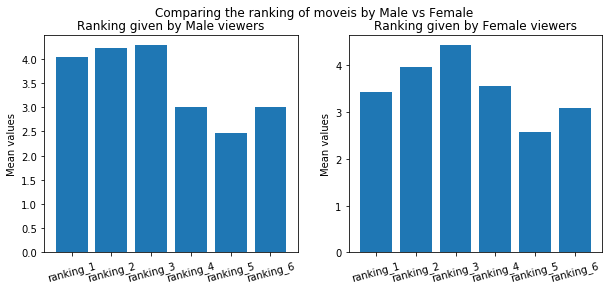

In [95]:
# plotting both the male and female 
plt.figure(figsize=(10,4))
plt.suptitle('Comparing the ranking of moveis by Male vs Female')

plt.subplot(1,2,1)
plt.bar(ranking_male.index,ranking_male.values)
plt.title('Ranking given by Male viewers')
plt.xticks(rotation=15)
plt.ylabel('Mean values')

plt.subplot(1,2,2)
plt.bar(ranking_female.index,ranking_female.values)
plt.title('Ranking given by Female viewers')
plt.xticks(rotation=15)
plt.ylabel('Mean values')

plt.show()

In [96]:
popular_view_by_male =males_df[males_df.columns.values[3:9]].sum()
popular_view_by_female =females_df[females_df.columns.values[3:9]].sum()

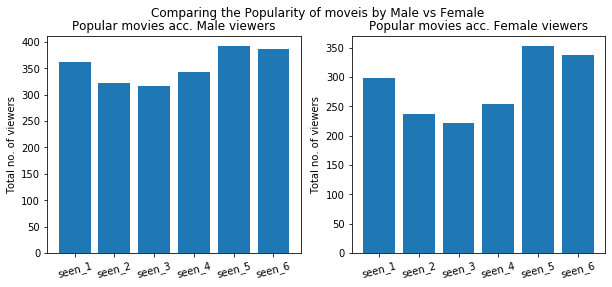

In [99]:
# plotting both the male and female 
plt.figure(figsize=(10,4))
plt.suptitle('Comparing the Popularity of moveis by Male vs Female')

plt.subplot(1,2,1)
plt.bar(popular_view_by_male.index,popular_view_by_male.values)
plt.title('Popular movies acc. Male viewers')
plt.xticks(rotation=15)
plt.ylabel('Total no. of viewers')

plt.subplot(1,2,2)
plt.bar(popular_view_by_female.index,popular_view_by_female.values)
plt.title('Popular movies acc. Female viewers')
plt.xticks(rotation=15)
plt.ylabel('Total no. of viewers')

plt.show()

###### 9. Next Steps

Potential next steps:
- Segmenting the data based on columns like `Education`,`Location` see the different result we have obtained now.
- Cleaning other columns looking for new relations
    - Which character do respondents like the most?
    - Which character do respondents dislike the most?
    - Which character is the most controversial (split between likes and dislikes)?
    
- Categories the age group and see if there is any relationship with the moveis sequels.
  
- Clustering the data to understand the relationship between different respondent.